In [49]:
# FAKE and REAL NEWS CLASSIFICATION ,CUSTOMIZING DATA DISPLAY & PLOTTING USING PYTHON.

# FAKE and REAL NEWS CLASSIFICATION ,CUSTOMIZING DATA DISPLAY & PLOTTING USING PYTHON.

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
import warnings
from sklearn.naive_bayes import MultinomialNB

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize MultinomialNB classifier
classifier = MultinomialNB()
print(classifier)


MultinomialNB()


#### LOAD and EXPLORE Dataset

In [6]:
data = pd.read_csv('C:/Users/thand/Downloads/news_datasets.csv.zip')

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
data

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
5           6903                                        Tehran, USA   
6           7341  Girl Horrified At What She Watches Boyfriend D...   
7             95                  ‘Britain’s Schindler’ Dies at 106   
8           4869  Fact check: Trump and Clinton at the 'commande...   
9           2909  Iran reportedly makes new push for uranium con...   
10          1357  With all three Clintons in Iowa, a glimpse at ...   
11           988  Donald Trump’s Shockingly Weak Delegate Game S...   
12          7041  Strong Solar Storm, Tech Risks Today | S0 News...   
13          7623       10 Ways America Is Preparing for World War 3   
14          1571                   Trump takes on Cruz, but lightly   
15          4739                         How women lead differently   
16          7737  Shocking! Michele Obama & Hillary Caught Glamo...   
17          8716  Hillary Clinton in HUGE Trouble After America ...   
18          3304  What's in that Iran bill that Obama doesn't like?   
19          3078  The 1 chart that explains everything you need ...   
20          2517  The slippery slope to Trump’s proposed ban on ...   
21         10348  Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...   
22           778  Hillary Clinton Makes A Bipartisan Appeal on S...   
23          3300  New Senate majority leader’s main goal for GOP...   
24          6155              ‘Inferno’ and the Overpopulation Myth   
25           636  Anti-Trump forces seek last-ditch delegate revolt   
26           755  Sanders Trounces Clinton in W. Va. -- But Will...   
27           626  Donald Trump Is Changing His Campaign Slogan t...   
28           691  Pure chaos: Donald Trump’s campaign management...   
29          5743  Syrian War Report – November 1, 2016: Syrian M...   
30          1787                     GOP insiders: Carly crushed it   
31          7808  Jeffrey Sewell et al. : Metabiology face to fa...   
32          6484         Why It’s Necessary To Relax Into A Stretch   
33          7385  Brexit Encourages UK to Trade With Non-EU Stat...   
34          9016  2016 interview with Socrates: Another day of L...   
35          9324  Mike Pence Drapes Shawl Over Immodest Lady Jus...   
36          8983       First Ever Hindu Woman Elected into Congress   
37          8965  Donald Groped Hillary in 2005! Trump and Weine...   
38          5580  Ex-Assistant FBI Director: Clintons Are a Crim...   
39          9757  Hillary Wants Aggressively Interventionist For...   
40          1967  Both parties want to craft populist messages f...   
41           431  First Take: Wall Street bids goodbye to June hike   
42          5955  Real Disclosure! Secret Alien Base Found In Mo...   
43          7455  Homeless Woman Protects Trump’s Walk of Fame S...   
44          5224  With 3:20 a.m. tweet storm Saturday, Clinton c...   
45          7793  220 ‘Significant’ Pipeline Spills Already This...   
46          2777  Obama makes the right call to tough it out in ...   
47           587  Senate race rankings: Dems attack as GOP lays ...   
48          9403  ‘He didn’t know the boy didn’t want to be rape...   
49          5931  Pieczenik “Rogue FBI Agents and Wikileaks are ...   
50          3027    American politics has reached peak polarization   
51          4377  Anti-Muhammad cartoon contest: Free speech or ...   
52          5937  3 Effects of Substance Abuse on Individual, Fa...   
53          7277  Tree Shaped Vertical Farms That Grow 24 Acres ...   
54          5521               New Comment Features have been Added   
55          3627         World

In [9]:
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [47]:
data.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text  label  word_count  \
0  Daniel Greenfield, a Shillman Journalism Fello...      1        1473   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      1         517   
2  U.S. Secretary of State John F. Kerry said Mon...      0         484   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      1         498   
4  It's primary day in New York and front-runners...      0         376   
5    \nI’m not an immigrant, but my grandparents ...      1        2708   
6  Share This Baylee Luciani (left), Screenshot o...      1         644   
7  A Czech stockbroker who saved more than 650 Je...      0         143   
8  Hillary Clinton and Donald Trump made some ina...      0        2789   
9  Iranian negotiators reportedly have made a las...      0         773   

                                     character_types  
0  {'alphabet': 23, 'digit': 0, 'punctuation': 0,...  
1  {'alphabet': 70, 'digit': 0, 'punctuation': 2,...  
2  {'alphabet': 35, 'digit': 0, 'punctuation': 0,...  
3  {'alphabet': 66, 'digit': 0, 'punctuation': 4,...  
4  {'alphabet': 39, 'digit': 0, 'punctuation': 1,...  
5  {'alphabet': 9, 'digit': 0, 'punctuation': 1, ...  
6  {'alphabet': 61, 'digit': 0, 'punctuation': 0,...  
7  {'alphabet': 23, 'digit': 3, 'punctuation': 0,...  
8  {'alphabet': 50, 'digit': 0, 'punctuation': 5,...  
9  {'alphabet': 61, 'digit': 0, 'punctuation': 0,...

In [10]:
print(f"Data Shape : {data.shape}")
print(f"Data Size : {data.size}")

Data Shape : (6335, 4)
Data Size : 25340


In [11]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [12]:
data.dtypes.value_counts()

object    3
int64     1
Name: count, dtype: int64

In [13]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

#### Preprocess Data

In [14]:
data.dropna(inplace=True)

In [15]:
data['label'] = data['label'].map({'FAKE': 1, 'REAL': 0})


In [16]:
X = data['text']


In [17]:
y = data['label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Engineering-Count Vectorization

In [19]:
vectorizer = CountVectorizer(stop_words='english')

In [20]:
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

#### TRAIN NAIVE Bayes Classifier

In [21]:
# Initialize Naive Bayes Classifier
classifier = MultinomialNB()

In [22]:
classifier.fit(X_train_counts, y_train)

MultinomialNB()

#### Evaluate Model

In [23]:
y_pred = classifier.predict(X_test_counts)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.898973954222573


In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[595  44]
 [ 84 544]]


#### Plot Distribution of fake and real news

In [26]:
counts = data['label'].value_counts()

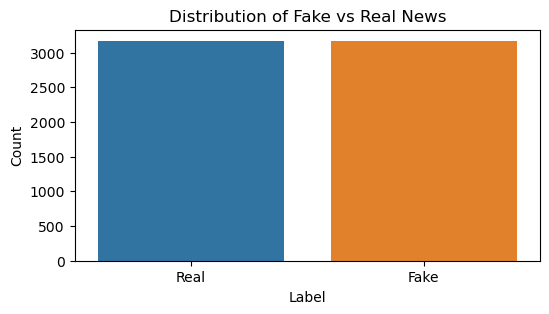

In [27]:
plt.figure(figsize=(6, 3))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Fake vs Real News')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.show()

#### Classify News

In [28]:
def classify_news(text):
    # Vectorize the input text
    text_counts = vectorizer.transform([text])
    # Predict the label (0 for real, 1 for fake)
    prediction = classifier.predict(text_counts)
    # Return the label
    if prediction[0] == 0:
        return "Real"
    else:
        return "Fake"

### The below lines are for checking each line separately

This type of code is not efficient for classifying all the data at a time.

In [29]:
test_text = "Google Pinterest Digg Linkedin Reddit Stumbleu.."
print("Classification:", classify_news(test_text))

Classification: Fake


In [30]:
test_text = "It's primary day in New York and front-runners..."
print("Classification:", classify_news(test_text))

Classification: Real


### The below2 lines cell code is to display all the rows and column

This code cells are having the code that gives all the rows and columns without leaving any one but it displays some rows from first and some rows from last lines data but not all. The cell just below is to display all rows of the real news as well as it is applicable to all these type of multiple rows displaying furtherly by default. If not we should use this cell again for that. 

In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [32]:
real_news = data[data['label'] == 0]
fake_news = data[data['label'] == 1]

In [33]:
print("Real News:")
print(real_news)

Real News:
      Unnamed: 0                                              title  \
2           3608        Kerry to go to Paris in gesture of sympathy   
4            875   The Battle of New York: Why This Primary Matters   
7             95                  ‘Britain’s Schindler’ Dies at 106   
8           4869  Fact check: Trump and Clinton at the 'commande...   
9           2909  Iran reportedly makes new push for uranium con...   
10          1357  With all three Clintons in Iowa, a glimpse at ...   
11           988  Donald Trump’s Shockingly Weak Delegate Game S...   
14          1571                   Trump takes on Cruz, but lightly   
15          4739                         How women lead differently   
18          3304  What's in that Iran bill that Obama doesn't like?   
19          3078  The 1 chart that explains everything you need ...   
20          2517  The slippery slope to Trump’s proposed ban on ...   
22           778  Hillary Clinton Makes A Bipartisan Appeal on S..

In [34]:
 print("Fake News:")
 print(fake_news)

Fake News:
      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
5           6903                                        Tehran, USA   
6           7341  Girl Horrified At What She Watches Boyfriend D...   
12          7041  Strong Solar Storm, Tech Risks Today | S0 News...   
13          7623       10 Ways America Is Preparing for World War 3   
16          7737  Shocking! Michele Obama & Hillary Caught Glamo...   
17          8716  Hillary Clinton in HUGE Trouble After America ...   
21         10348  Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...   
24          6155              ‘Inferno’ and the Overpopulation Myth   
29          5743  Syrian War Report – November 1, 2016: Syrian M...   
31          7808  Jeffrey Sewell et al. : Metabiology face to fa..

 Here we again used this just below cell because the pre defined cell was not applicable for this time. 

In [35]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Sorting the data of title column respect to it's Alphabetical & special characters order

Data is sorted in Ascending order.Some special characters like "",'',#,( ),*,Numericals,>,|,?,@,uppercase letters...etc., sorted initially and then jumped to alphabetical order because it is the predefined order of sorting.

In [36]:
data_sorted = data.sort_values(by='title')

# Group the DataFrame by the first letter of the 'title' column
groups = data_sorted.groupby(data_sorted['title'].str[0])

# Display the news sorted by groups of the first letter of the title
for _, group_data in groups:
    print(group_data)

      Unnamed: 0                                              title  \
243         4045  "America has a simple ideology": how one of Ru...   
2448        3041  "Political identity is fair game for hatred": ...   
5870        5300  "Russia is concentrating" 2.0: Putin's new pol...   
1378        8438  "Top Five Clinton Donors Are Jewish" - How Ant...   

                                                   text  label  
243   The United States comes up constantly when you...      0  
2448  In 1960, Americans were asked whether they wou...      0  
5870  October 28, 2016 -  By Eduard Popov for Fort R...      1  
1378  "Top Five Clinton Donors Are Jewish" - How Ant...      1  
      Unnamed: 0                                              title  \
1130        8024  #2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...   
1968        6404  #BREAKING: SECOND Assassination Attempt On Tru...   
1898          83  #BlackLivesMatter: Why movement is its own wor...   
571         6132  #BoycottComedian…

 ### To Distribute the Fake & Real Data Using Piechart 

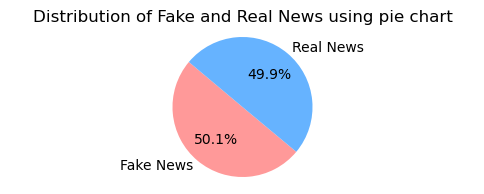

In [37]:
news_counts = data['label'].value_counts()

# Create labels for the pie chart
labels = ['Fake News', 'Real News']

# Create a pie chart
plt.figure(figsize=(6, 2))
plt.pie(news_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Fake and Real News using pie chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### To Plot using both pie chart & Bar plot Parallelly

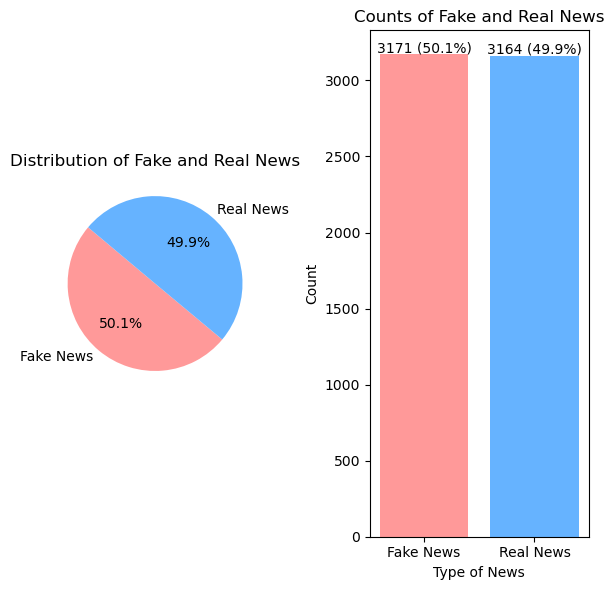

In [38]:
labels = ['Fake News', 'Real News']

# Create a pie chart
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.pie(news_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Fake and Real News')

plt.subplot(1, 2, 2)
plt.bar(labels, news_counts, color=['#ff9999', '#66b3ff'])
plt.xlabel('Type of News')
plt.ylabel('Count')
plt.title('Counts of Fake and Real News')

# Show percentage on top of bars
for i, count in enumerate(news_counts):
    plt.text(i, count + 10, f"{count} ({news_counts[i]/data.shape[0]*100:.1f}%)", ha='center')

plt.tight_layout()
plt.show()

### To plot the Pie chart Using some exploding
Means the fake and the real news parts will get some spacing between them. 

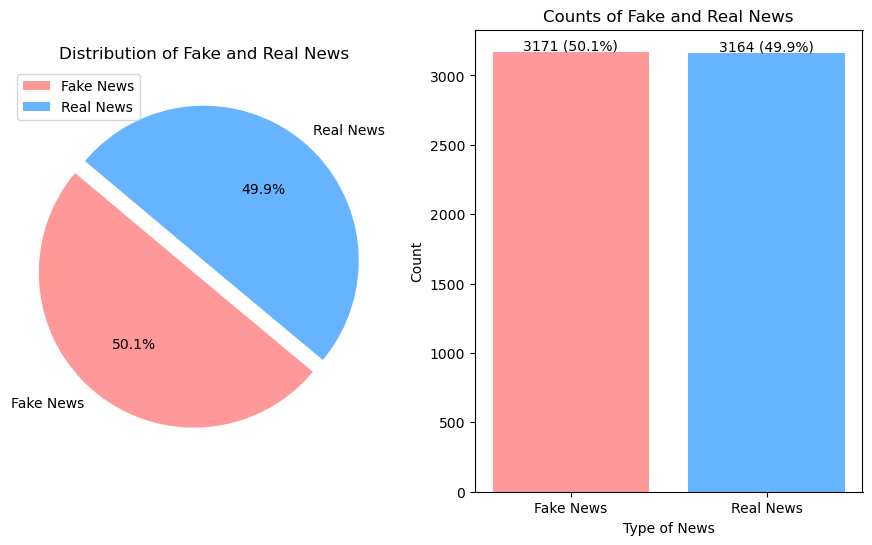

In [39]:
explode = (0.1, 0)

plt.figure(figsize=(11, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(news_counts, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Fake and Real News')
plt.legend()

# Bar plot
plt.subplot(1, 2, 2)
bars = plt.bar(labels, news_counts, color=['#ff9999', '#66b3ff'])
plt.xlabel('Type of News')
plt.ylabel('Count')
plt.title('Counts of Fake and Real News')

# Show percentage on top of bars
for i, count in enumerate(news_counts):
    plt.text(i, count + 10, f"{count} ({news_counts[i]/data.shape[0]*100:.1f}%)", ha='center')

In [40]:
# Save the plot as an image file
plt.savefig('news_distribution.png')


<Figure size 640x480 with 0 Axes>

### Plotting model for the dataset using grid lines distribution.
Grid lines have colours to describe the type of news through these lines and the grid lines have some width such that user can increase it for better visibility and understanding.

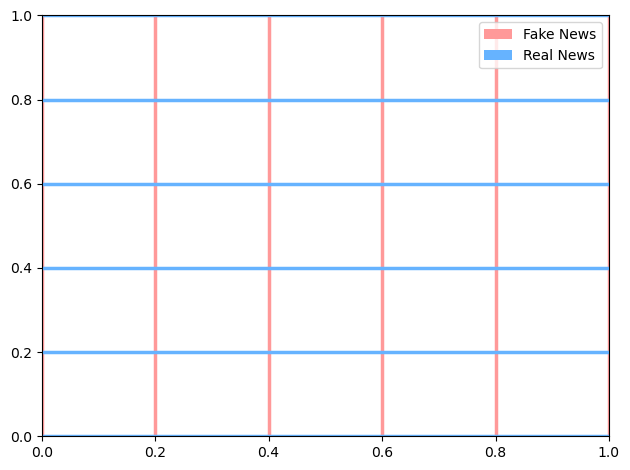

In [221]:
   plt.legend(bars, labels)
    # Add grid lines
plt.grid(axis='x', linestyle='-', linewidth=2.5)
plt.grid(axis='y', linestyle='-', linewidth=2.5)
for grid_line in plt.gca().get_xgridlines():
    grid_line.set_color('#ff9999')  # Color for fake news
for grid_line in plt.gca().get_ygridlines():
    grid_line.set_color('#66b3ff')  # Color for real news
plt.tight_layout()
plt.show()

### To display the type of characters & their count in each row in the given 'title' column

In [46]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
data['word_count'] = data['text'].apply(lambda x: len(word_tokenize(x)))

# Display the DataFrame with word count
print(data[['text', 'word_count']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                   text  word_count
0     Daniel Greenfield, a Shillman Journalism Fello...        1473
1     Google Pinterest Digg Linkedin Reddit Stumbleu...         517
2     U.S. Secretary of State John F. Kerry said Mon...         484
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...         498
4     It's primary day in New York and front-runners...         376
5       \nI’m not an immigrant, but my grandparents ...        2708
6     Share This Baylee Luciani (left), Screenshot o...         644
7     A Czech stockbroker who saved more than 650 Je...         143
8     Hillary Clinton and Donald Trump made some ina...        2789
9     Iranian negotiators reportedly have made a las...         773
10    CEDAR RAPIDS, Iowa — “I had one of the most wo...         671
11    Donald Trump’s organizational problems have go...         471
12    Click Here To Learn More About Alexandra's Per...         235
13    October 31, 2016 at 4:52 am \nPretty factu

### To count the no.of special characters in each line of TITLE column.

In [42]:
from collections import Counter
import string

In [43]:
def identify_character_types(title):
    # Tokenize the text into individual characters
    characters = [char for char in title]

    # Identify types of characters
    types = {'alphabet': 0, 'digit': 0, 'punctuation': 0, 'whitespace': 0, 'other': 0}
    for char in characters:
        if char.isalpha():
            types['alphabet'] += 1
        elif char.isdigit():
            types['digit'] += 1
        elif char in string.punctuation:
            types['punctuation'] += 1
        elif char.isspace():
            types['whitespace'] += 1
        else:
            types['other'] += 1

    return types

In [44]:
data['character_types'] = data['title'].apply(identify_character_types)

In [45]:
print(data[['character_types']])

                                        character_types
0     {'alphabet': 23, 'digit': 0, 'punctuation': 0,...
1     {'alphabet': 70, 'digit': 0, 'punctuation': 2,...
2     {'alphabet': 35, 'digit': 0, 'punctuation': 0,...
3     {'alphabet': 66, 'digit': 0, 'punctuation': 4,...
4     {'alphabet': 39, 'digit': 0, 'punctuation': 1,...
5     {'alphabet': 9, 'digit': 0, 'punctuation': 1, ...
6     {'alphabet': 61, 'digit': 0, 'punctuation': 0,...
7     {'alphabet': 23, 'digit': 3, 'punctuation': 0,...
8     {'alphabet': 50, 'digit': 0, 'punctuation': 5,...
9     {'alphabet': 61, 'digit': 0, 'punctuation': 0,...
10    {'alphabet': 79, 'digit': 0, 'punctuation': 1,...
11    {'alphabet': 57, 'digit': 0, 'punctuation': 0,...
12    {'alphabet': 43, 'digit': 7, 'punctuation': 6,...
13    {'alphabet': 33, 'digit': 3, 'punctuation': 0,...
14    {'alphabet': 26, 'digit': 0, 'punctuation': 1,...
15    {'alphabet': 23, 'digit': 0, 'punctuation': 0,...
16    {'alphabet': 61, 'digit': 0, 'punctuation'